# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** George Pablo Adriel
- **Email:** M014D4KY1725@bangkit.academy
- **ID Dicoding:** georgepabloadriel

## Menentukan Pertanyaan Bisnis

- What season is the highest temperature?
- Is the ratio between registered and casual customers big enough?
- Can you make a comparison?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/GeorgePabloA/submission/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/GeorgePabloA/submission/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [13]:
day_df.groupby(by="season").agg({
    "yr": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

yr   cnt                                
       nunique   max   min         mean          std
season                                              
1            2  7836   431  2604.132597  1399.942119
2            2  8362   795  4992.331522  1695.977235
3            2  8714  1115  5644.303191  1459.800381
4            2  8555    22  4728.162921  1699.615261

In [14]:
day_df.groupby(by="weathersit").agg({
    "yr": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

yr   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1                2  8714  431  4876.786177  1879.483989
2                2  8362  605  4035.862348  1809.109918
3                2  4639   22  1803.285714  1240.284449

In [15]:

day_df.groupby(by="weathersit").yr.nunique().sort_values(ascending=False)

weathersit
1    2
2    2
3    2
Name: yr, dtype: int64

In [16]:
day_df.groupby(by="season").yr.nunique().sort_values(ascending=False)

season
1    2
2    2
3    2
4    2
Name: yr, dtype: int64

In [17]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="outer",
)
day_hour_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,NaN
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,NaN
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,NaN
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,NaN
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,NaN


In [18]:
day_hour_df.groupby(by="temp").weathersit.nunique().sort_values(ascending=False).reset_index().head(10)


,temp,weathersit
0,0.22,4
1,0.14,4
2,0.20,4
3,0.38,3
4,0.70,3
5,0.40,3
6,0.52,3
7,0.68,3
8,0.42,3
9,0.66,3


In [19]:
day_hour_df.groupby(by="atemp").weathersit.nunique().sort_values(ascending=False).reset_index().head(10)


,atemp,weathersit
0,0.2273,4
1,0.1970,4
2,0.1364,4
3,0.6364,3
4,0.5152,3
5,0.7879,3
6,0.6818,3
7,0.3333,3
8,0.1818,3
9,0.5455,3


In [20]:
day_hour_df.groupby(by="hum").weathersit.nunique().sort_values(ascending=False).reset_index().head(10)


,hum,weathersit
0,0.86,4
1,0.93,4
2,0.65,3
3,0.60,3
4,0.61,3
5,0.62,3
6,0.41,3
7,0.63,3
8,0.64,3
9,1.00,3


In [21]:
day_hour_df.groupby(by="windspeed").weathersit.nunique().sort_values(ascending=False).reset_index().head(10)


,windspeed,weathersit
0,0.3284,4
1,0.1940,4
2,0.0896,4
3,0.4627,3
4,0.1045,3
5,0.2985,3
6,0.3582,3
7,0.2836,3
8,0.1642,3
9,0.2239,3


In [22]:
day_hour_df.groupby(by="windspeed").weathersit.nunique().sort_values(ascending=False).reset_index().head(10)


,windspeed,weathersit
0,0.3284,4
1,0.1940,4
2,0.0896,4
3,0.4627,3
4,0.1045,3
5,0.2985,3
6,0.3582,3
7,0.2836,3
8,0.1642,3
9,0.2239,3


In [23]:
day_df.describe(include="all")
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [24]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


In [25]:
day_df.groupby(by="season").agg({
    "yr": "nunique",
    "cnt": "sum",
    "casual":  ["min", "max"]
})


yr      cnt casual      
       nunique      sum    min   max
season                              
1            2   471348      9  3155
2            2   918589    120  3410
3            2  1061129    118  3160
4            2   841613      2  3031

In [26]:
day_df.groupby(by="season").agg({
    "yr": "nunique",
    "cnt": "sum",
    "registered":  ["min", "max"]
})

yr      cnt registered      
       nunique      sum        min   max
season                                  
1            2   471348        416  5315
2            2   918589        674  6456
3            2  1061129        889  6917
4            2   841613         20  6946

In [27]:
day_df.groupby(by="weathersit").agg({
    "yr": "nunique",
    "cnt": "sum",
    "casual":  ["min", "max"]
})

yr      cnt casual      
           nunique      sum    min   max
weathersit                              
1                2  2257952     15  3410
2                2   996858      9  3155
3                2    37869      2  1264

In [28]:
day_df.groupby(by="weathersit").agg({
    "yr": "nunique",
    "cnt": "sum",
    "registered":  ["min", "max"]
})

yr      cnt registered      
           nunique      sum        min   max
weathersit                                  
1                2  2257952        416  6946
2                2   996858        491  6844
3                2    37869         20  4324

In [29]:
hour_season_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="outer",
)
hour_season_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,NaN
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,NaN
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,NaN
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,NaN
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,NaN


In [30]:
day_hour_df.groupby(by="season").agg({
    "yr": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum"
}).sort_values(by="cnt", ascending=False)

,yr,casual,registered,cnt
season,,,,
3,2,452182,1670076,2122258
2,2,407044,1430134,1837178
4,2,259564,1423662,1683226
1,2,121244,821452,942696


In [31]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="outer",
)
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


In [32]:
all_df.groupby(by=["season", "weathersit"]).agg({
    "casual" : "sum",
    "registered": "sum"
})

casual  registered
season weathersit                    
1      1            86024      551290
       2            33539      246239
       3             1673       23708
       4                8         215
2      1           297585      993864
       2           101626      393833
       3             7833       42437
3      1           341959     1259425
       2            98757      364854
       3            11466       45797
4      1           183523      882455
       2            70335      483627
       3             5706       57580

In [33]:
all_df.to_csv("all.csv")

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Can you make a data comparison between registered customers and casual customers?

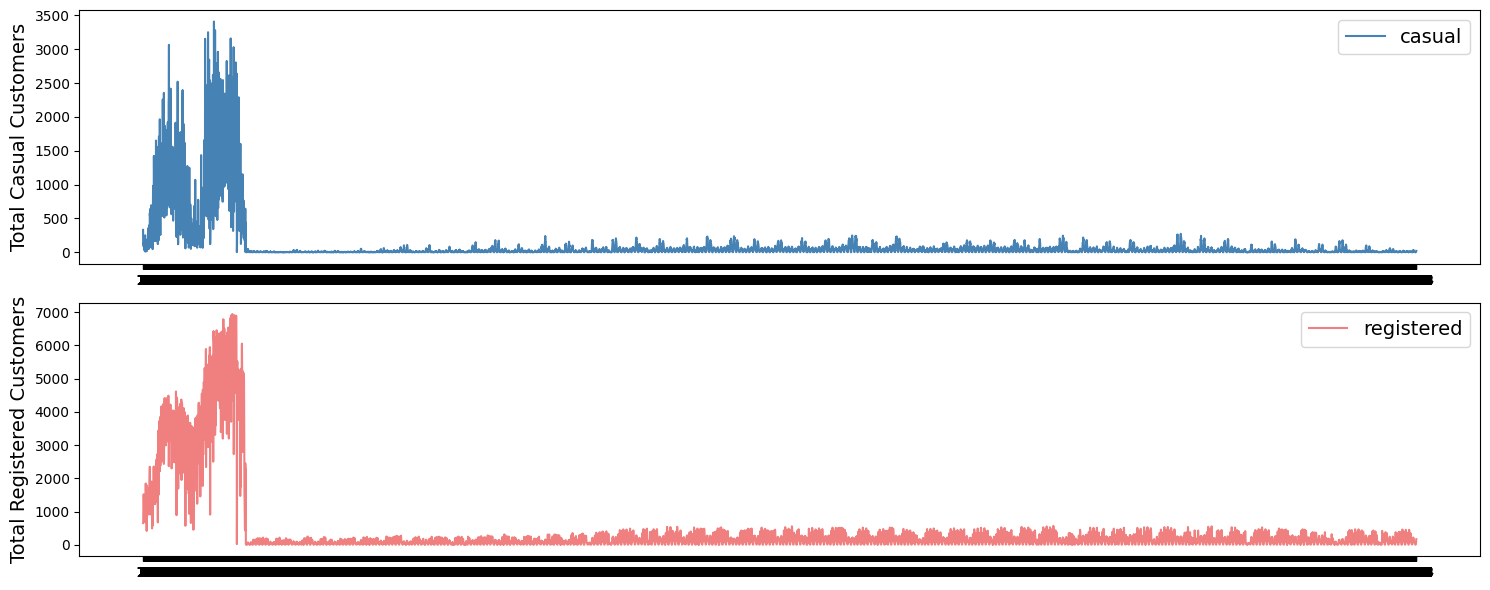

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

all_df = pd.read_csv("all.csv")



fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

x = np.arange(len(all_df["season"]))[:len(all_df["season"])//2]
width = 0.4

casual = axs[0].plot(x, all_df["casual"][:len(all_df["casual"])//2], label='casual', linestyle='-', color='steelblue')
axs[0].set_title(None, size=16)
axs[0].set_ylabel('Total Casual Customers', size=14)
axs[0].set_xticks(x)
axs[0].legend(fontsize=14)

registered = axs[1].plot(x, all_df["registered"][:len(all_df["registered"])//2], label='registered', linestyle='-', color='lightcoral')
axs[1].set_title(None, size=16)
axs[1].set_ylabel('Total Registered Customers', size=14)
axs[1].set_xticks(x)
axs[1].legend(fontsize=14)

plt.tight_layout()

### Pertanyaan 2:

What season is the highest temperature?

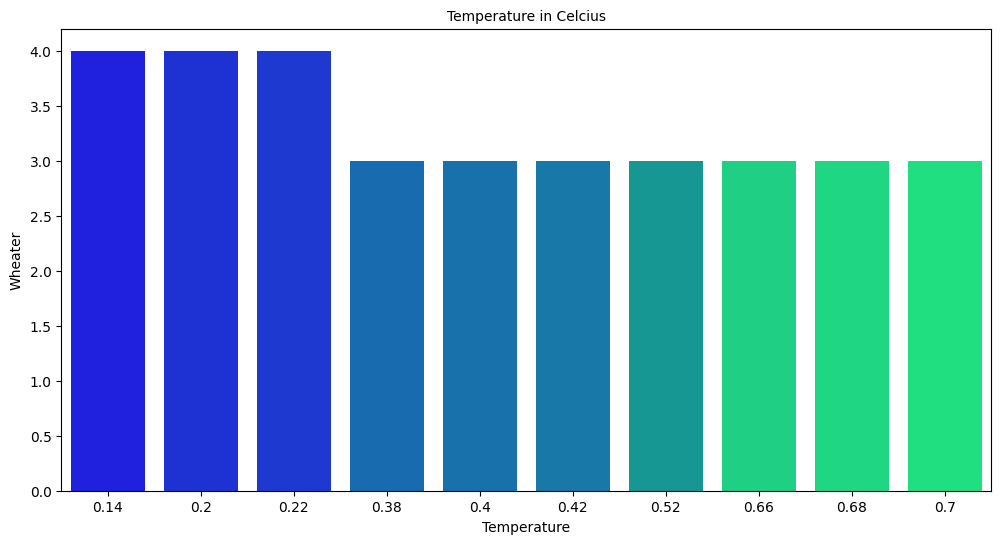

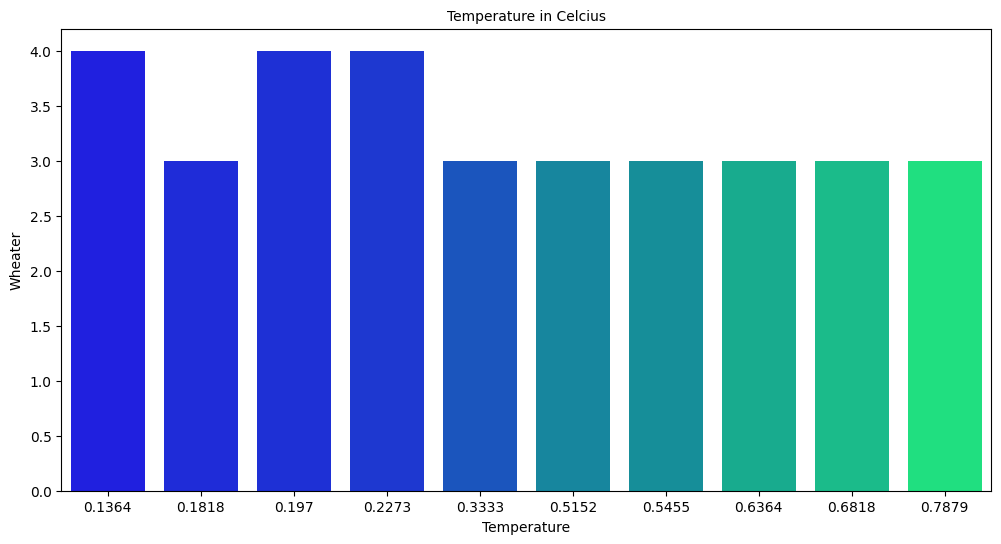

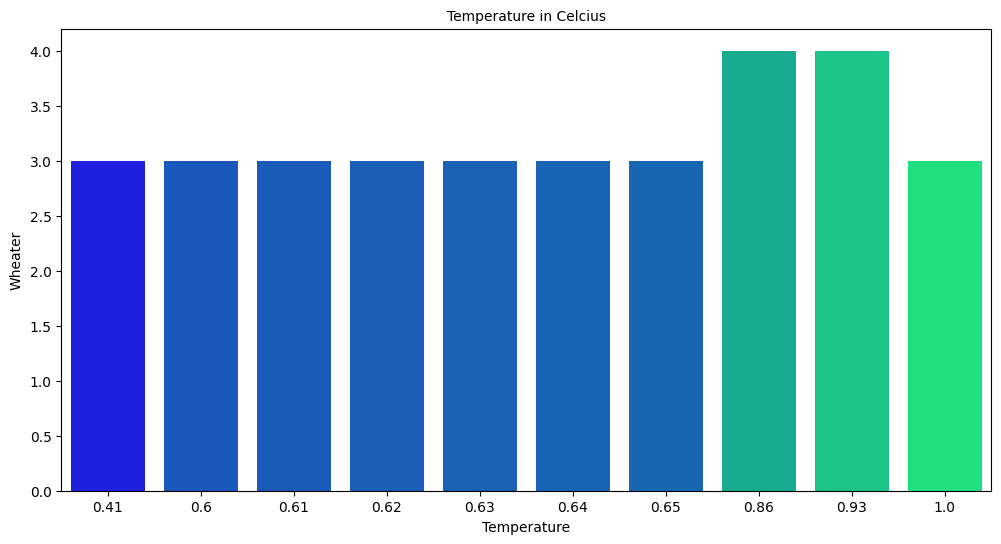

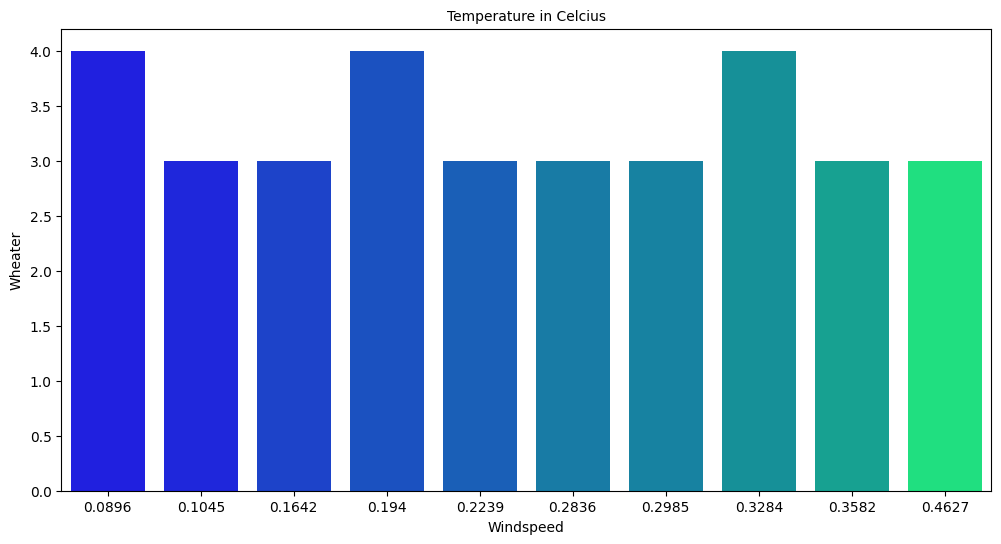

In [35]:
temp_yr_df = all_df.groupby("temp").weathersit.nunique().sort_values(ascending=False).reset_index()

temp_yr_df.head(15)
x = np.arange(len(temp_yr_df["temp"]))

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x="temp", y="weathersit", data=temp_yr_df.head(10), hue="temp", palette='winter', ax=ax, legend=False)
ax.set_ylabel('Wheater')
ax.set_xlabel('Temperature')
ax.set_title("Temperature in Celcius", loc="center", fontsize=12, font='Times New Roman')
ax.tick_params(axis ='y', labelsize=10)


temp_yr_df = all_df.groupby("atemp").weathersit.nunique().sort_values(ascending=False).reset_index()

temp_yr_df.head(15)
x = np.arange(len(temp_yr_df["atemp"]))

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x="atemp", y="weathersit", data=temp_yr_df.head(10), hue="atemp", palette='winter', ax=ax, legend=False)
ax.set_ylabel('Wheater')
ax.set_xlabel('Temperature')
ax.set_title("Temperature in Celcius", loc="center", fontsize=12, font='Times New Roman')
ax.tick_params(axis ='y', labelsize=10)

temp_yr_df = all_df.groupby("hum").weathersit.nunique().sort_values(ascending=False).reset_index()

temp_yr_df.head(15)
x = np.arange(len(temp_yr_df["hum"]))

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x="hum", y="weathersit", data=temp_yr_df.head(10), hue="hum", palette='winter', ax=ax, legend=False)
ax.set_ylabel('Wheater')
ax.set_xlabel('Temperature')
ax.set_title("Temperature in Celcius", loc="center", fontsize=12, font='Times New Roman')

temp_yr_df = all_df.groupby("windspeed").weathersit.nunique().sort_values(ascending=False).reset_index()

temp_yr_df.head(15)
x = np.arange(len(temp_yr_df["windspeed"]))

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x="windspeed", y="weathersit", data=temp_yr_df.head(10), hue="windspeed", palette='winter', ax=ax, legend=False)
ax.set_ylabel('Wheater')
ax.set_xlabel('Windspeed')
ax.set_title("Temperature in Celcius", loc="center", fontsize=12, font='Times New Roman')

plt.show()

## Conclusion

- The highest temperature in 17 C at the winter season.
- Yes, and more registered customers than casual customers.